In [1]:
import mediapipe as mp
import cv2
import numpy as np
import math

from ctypes import cast, POINTER
from comtypes import CLSCTX_ALL
from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume

In [2]:
mpHands = mp.solutions.hands
mpDraw = mp.solutions.drawing_utils

In [3]:
def findHandLandMarks(image, handNumber, draw=False):
    originalImage = image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # mediapipe needs RGB
    results = hands.process(image)
    landMarkList = []

    if results.multi_hand_landmarks:  # returns None if hand is not found
        hand = results.multi_hand_landmarks[handNumber] #results.multi_hand_landmarks returns landMarks for all the hands

        for id, landMark in enumerate(hand.landmark):
            # landMark holds x,y,z ratios of single landmark
            imgH, imgW, imgC = originalImage.shape  # height, width, channel for image
            xPos, yPos = int(landMark.x * imgW), int(landMark.y * imgH)
            landMarkList.append([id, xPos, yPos])

        if draw:
            mpDraw.draw_landmarks(originalImage, hand, mpHands.HAND_CONNECTIONS)

    return landMarkList

In [4]:
hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.7,
                                   min_tracking_confidence=0.7)

webcamFeed = cv2.VideoCapture(0)

devices = AudioUtilities.GetSpeakers()
interface = devices.Activate(
IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
volume = cast(interface, POINTER(IAudioEndpointVolume))
print(volume.GetVolumeRange()) 

(-96.0, 0.0, 0.125)


In [ ]:
while True:
    status, image = webcamFeed.read()
    handLandmarks1 = findHandLandMarks(image=image, handNumber=0, draw=True)
    try:
        handlandmarks2 = findHandLandMarks(image=image, handNumber=1, draw=True)
    except:
        pass

    if(len(handLandmarks1) != 0 and len(handlandmarks2) != 0):
        #for volume control we need 4th and 8th landmark
        x11, y11 = handLandmarks1[4][1], handLandmarks1[4][2]
        x21, y21 = handLandmarks1[8][1], handLandmarks1[8][2]
        length = math.hypot(x21-x11, y21-y11)
        print(length)

        x12, y12 = handlandmarks2[4][1], handlandmarks2[4][2]
        x22, y22 = handlandmarks2[8][1], handlandmarks2[8][2]
        length2 = math.hypot(x22-x12, y22-y12)

        #Hand range(length): 50-250
        #Volume Range: (-65.25, 0.0)
        if(length>30 and length<200 and length2<25):
            volumeValue = np.interp(length, [27, 200], [-62, 0.0]) #coverting length to proportionate to volume range
            volume.SetMasterVolumeLevel(volumeValue, None)


        cv2.circle(image, (x11, y11), 15, (255, 0, 255), cv2.FILLED)
        cv2.circle(image, (x21, y21), 15, (255, 0, 255), cv2.FILLED)
        cv2.line(image, (x11, y11), (x21, y21), (255, 0, 255), 3)
        cv2.circle(image, (x12, y12), 15, (255, 0, 255), cv2.FILLED)
        cv2.circle(image, (x22, y22), 15, (255, 0, 255), cv2.FILLED)        
        cv2.line(image, (x12, y12), (x22, y22), (255, 0, 255), 3)

    cv2.imshow("Volume", cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
webcamFeed.release()

18.681541692269406
8.94427190999916
6.4031242374328485
3.6055512754639896
5.099019513592785
6.0
21.54065922853802
45.65084884205331
29.427877939124325
22.090722034374522
322.1878334139885
322.48565859585136
325.12459150301135
327.42021929013487
328.3062594590605
329.2369967060203
321.5991293520553
318.1980515339464
79.62411694957753
35.84689665786984
40.79215610874228
42.37924020083418
44.14748010928823
40.01249804748512
56.85947590331799
103.8123306741545
176.47662734764623
228.21481108815001
259.69982672308424
273.7535387899122
311.4482300479487
318.7789202566569
325.63169378916416
337.3262515725688
341.5391632009424
339.6954518388493
149.0033556669111
84.05950273467005
66.24198064671678
40.162171256046406
35.90264614203249
63.655321851358195
108.90821823902915
201.06217943710845
258.63101128828305
291.03436223236594
320.9143187830671
332.8858663265835
336.1621632486321
338.7890198929121
336.00148809194286
327.0611563607026
295.3404814785809
154.48624534242524
94.33981132056603
55.03

# <center>OUTPUT</center>

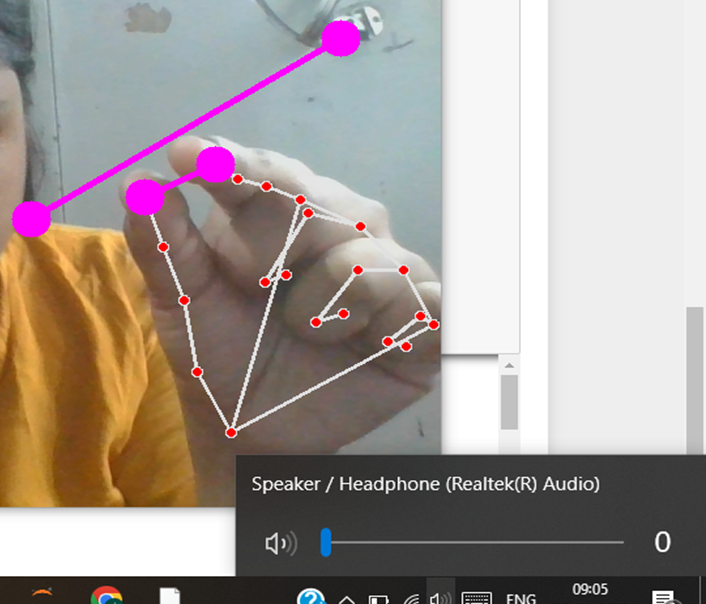